# Preliminary Project Notebook

### The Project

The way money is spent in colleges becomes highly critiqued by many over the years. Some may point out how high of a salary some college coaches can earn while students struggle to pay for tuition. In the following research, I intend to find how money is generated and allocated in college sports. 

This research may be important to others and especially me since it affects how money can be more efficiently used in higher education or it can clarify why sports is so useful to schools. Currently, I am a fourth-year student at UCLA, one of the largest public institutions in North America, and being involved in the school's finances can be insightful to not only me but other students who use these services. It may explain a lot about the process of college sports and how transparent schools are with their sports funds.

The data used is from the College Athletics Financial Information (CAFI) Database which posts all the money used in college sports from different leagues and divisions in a transparent manner. It includes different NCAA subdivisions, conferences, and the years of median earnings/spendings.

Since the data used has many years and easy aggregates to sort by, it may be useful to create graphs that illustrate change over time. Simple bar graphs and histograms can work, but it will be sure to include key details and listings of other schools or divisions. The values are large so they can also be condensed in the graphs with comparisons between other schools' expenses or earnings.

This research project is intended to either illustrate transparency and effectiveness in a school's allocation of funds for their sports programs or it will reveal and justify why many schools are under high criticism for their funds in sports. While comparing the data for UCLA, it will help generalize the picture to most schools and help generalize these details without making any assumptions. UCLA (currently ranked the number 1 public school) will be a great choice to research school spending because of its large student population and highly competitive sports programs. Hopefully, we can find data and perform analysis that reveals how well UCLA allocates its sports funds and compare it to the entire of sports programs across the US over time.

### The Data

In [451]:
import pandas as pd
# commands to read the datafile
df = pd.read_csv("University_of_California_Los_Angeles_data.csv")
# http://cafidatabase.knightcommission.org/fbs/pac-12/university-of-california-los-angeles

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 30 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Data                                                                   48 non-null     object 
 1   IPEDS ID                                                               16 non-null     float64
 2   Year                                                                   48 non-null     int64  
 3   NCAA Subdivision                                                       16 non-null     object 
 4   FBS Conference                                                         16 non-null     object 
 5   Total Expenses                                                         48 non-null     object 
 6   Excess Transfers Back                                                  48 non-null     objec

In [266]:
df.sample()

,Data,IPEDS ID,Year,NCAA Subdivision,FBS Conference,Total Expenses,Excess Transfers Back,Other Expenses,Medical,Competition Guarantees,...,Competition Guarantees.1,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
13,University of California-Los Angeles,110662.0,2018,Football Bowl Subdivision,Pacific-12 Conference,"$130,960,560",$0,"$19,321,534","$990,900","$1,596,000",...,"$1,184,874","$35,737,984","$18,033,018","$60,000","$2,548,165","$4,513,846,740","$37,702,515",NaN,"$92,639,138","$3,077,294"


In [452]:
# We can remove useless columns that mess with our missing values
df = df.drop("IPEDS ID", axis = 1) # we don't need the ID since it is useless to our analysis
df = df.drop("NCAA Subdivision", axis = 1) # We already know UCLA is in the Football Bowl Subdivision
df = df.drop("FBS Conference", axis = 1) # We already know UCLA is in the Pacific-12 Conference
# We will leave the other nan since the other cols are important observations
df.sample()

,Data,Year,Total Expenses,Excess Transfers Back,Other Expenses,Medical,Competition Guarantees,Recruiting,Game Expenses and Travel,Facilities and Equipment,...,Competition Guarantees.1,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
1,University of California-Los Angeles,2006,"$52,049,868",$0,"$9,198,032","$380,702","$1,965,680","$617,966","$8,902,715","$6,649,403",...,"$3,129,670","$11,656,366","$13,895,922","$210,000","$2,418,140","$2,099,931,000","$13,458,173","$2,433,931",NaN,"$39,777"


In [453]:
# We need to check for missing NaN values in the rows as well
print("Shape of our df:", df.shape)
print("Shape of our df with NaN removed:", df.dropna().shape)
# This shows us that dropping we have 2 rows that contain some missing values, we will ignore this
df[df.isna().any(axis=1)]
# rows 1 and 13 have missing values

Shape of our df: (48, 27)
Shape of our df with NaN removed: (46, 27)


,Data,Year,Total Expenses,Excess Transfers Back,Other Expenses,Medical,Competition Guarantees,Recruiting,Game Expenses and Travel,Facilities and Equipment,...,Competition Guarantees.1,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
1,University of California-Los Angeles,2006,"$52,049,868",$0,"$9,198,032","$380,702","$1,965,680","$617,966","$8,902,715","$6,649,403",...,"$3,129,670","$11,656,366","$13,895,922","$210,000","$2,418,140","$2,099,931,000","$13,458,173","$2,433,931",NaN,"$39,777"
13,University of California-Los Angeles,2018,"$130,960,560",$0,"$19,321,534","$990,900","$1,596,000","$1,620,167","$16,919,319","$18,319,503",...,"$1,184,874","$35,737,984","$18,033,018","$60,000","$2,548,165","$4,513,846,740","$37,702,515",NaN,"$92,639,138","$3,077,294"


In [454]:
# We need to convert the string columns of money ($) back to int using the following library and suggestion reference
# from stackoverflow:
# https://stackoverflow.com/questions/8421922/how-do-i-convert-a-currency-string-to-a-floating-point-number-in-python
from re import sub
from decimal import Decimal
import math

for col in range(2, df.shape[1]):
    for row in range(0, df.shape[0]):
        if isinstance(df.iloc[row, col], str):
            df.iloc[row, col] = int(Decimal(sub(r'[^\d.]', '', df.iloc[row, col])))
# changes each string column from index 2 to the last column into int
df = pd.concat([df[["Data", "Year"]], df.drop(["Data", "Year"], axis = 1).apply(pd.to_numeric)], axis = 1)
# changes cols to int

df.sample()

,Data,Year,Total Expenses,Excess Transfers Back,Other Expenses,Medical,Competition Guarantees,Recruiting,Game Expenses and Travel,Facilities and Equipment,...,Competition Guarantees.1,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
12,University of California-Los Angeles,2017,104106646,0,15251492,974959,1006000,1428613,14943522,15080782,...,1311441,36524730,21744254,60000,2648118,4674451955,27320772,9056837.0,97659767.0,3069257


In [455]:
# Cleaner nicer format printing with describe using reference from stackoverflow
# https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation
df.describe().apply(lambda s: s.apply('{0:.0f}'.format)) # rounds to nearest integer
# The output gives us what is expected, nothing very unordinary

,Year,Total Expenses,Excess Transfers Back,Other Expenses,Medical,Competition Guarantees,Recruiting,Game Expenses and Travel,Facilities and Equipment,Coaches Compensation,...,Competition Guarantees.1,"NCAA/Conference Distributions, Media Rights, and Post-Season Football",Ticket Sales,Institutional/Government Support,Student Fees,Total Academic Spending (University-Wide),Total Football Spending,Total Football Coaching Salaries,Athletics Related Debt,"Annual Debt Service, Leases and Rental Fees on Athletic Facilities"
count,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,47,47,48
mean,2012,2283248272,6265634,290995156,30911933,58969495,37048795,260762991,468524512,412374203,...,41148797,570494422,481755506,239584441,159143912,44972471617,607244204,174496725,2483428670,182400986
std,5,2924737213,17161416,352113169,39150518,71288839,48156153,331626471,624531982,535121048,...,51220697,785036694,592301701,328687908,224660192,49624143492,792300244,231138856,3143515377,250647088
min,2005,46010599,0,7250994,357307,968750,539420,6886878,5018166,7219570,...,503515,11042486,13895922,60000,2325330,2058458000,13219941,2009915,4876341,39777
25%,2009,102808240,0,15496851,962842,3140048,1323804,14940168,14795334,22391452,...,3002051,34597934,22237987,210000,2647774,4449833009,27205277,8507222,96722384,2959149
50%,2012,680624827,0,96753106,9655440,17185056,10934488,75432430,114002992,129546659,...,10019023,161087370,142819586,49772472,16822843,20737565397,192626717,58779572,1446422234,58051996
75%,2016,4514402259,0,669182394,62051542,142175892,74938338,537883100,873634858,760172680,...,97738192,856671245,1154521979,508371464,337032266,91426624802,1115426783,302318150,4016780034,260930955
max,2020,8901796513,67600061,982809818,114560600,191197763,161572321,1013618264,1951198949,1727536190,...,139974223,2638635767,1505355830,1077005049,602717544,145625528018,2519953457,793905989,9225929896,843320014


In [400]:
# importing graphing visualiztion libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

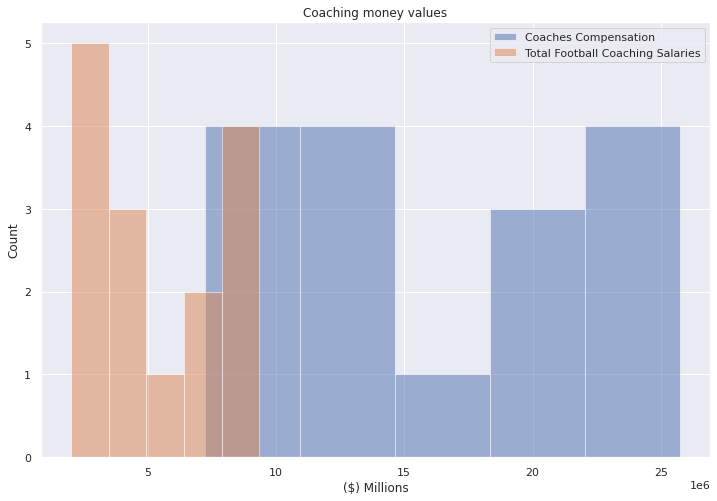

In [509]:
# Data viz
# Basic Histogram of coaching variables
plt.figure(figsize=(12, 8))
plt.hist(ucla_rows["Coaches Compensation"], bins = 5, alpha = 0.5, label = "Coaches Compensation")
plt.hist(ucla_rows["Total Football Coaching Salaries"], bins = 5, alpha = 0.5, label = "Total Football Coaching Salaries")
plt.ticklabel_format(style = "sci", axis = "x", scilimits = (6, 6))
plt.legend(loc = 'upper right')
plt.title('Coaching money values')
plt.xlabel('($) Millions')
plt.ylabel('Count')
plt.show()

[Text(0.5, 1.0, 'UCLA Revenue Over time'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Money ($) in Millions')]

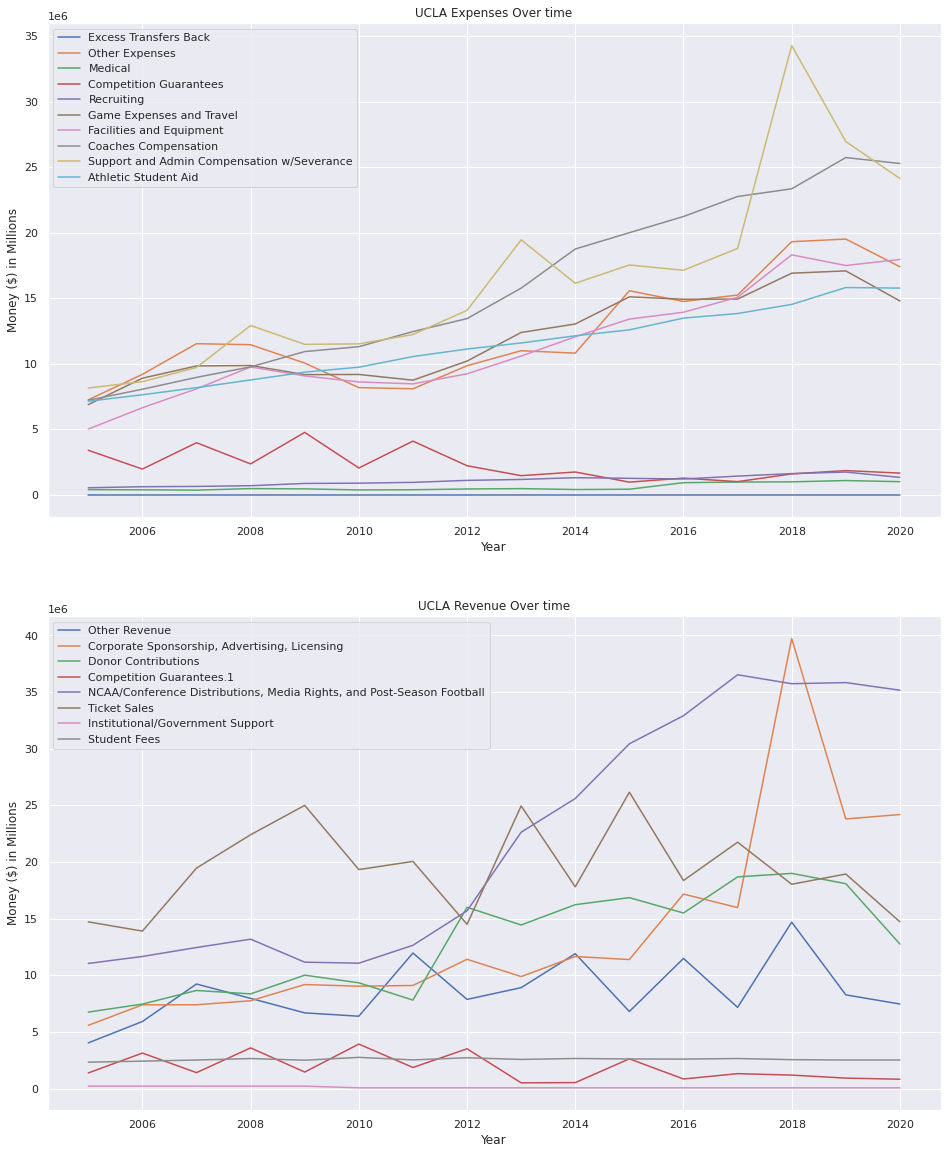

In [443]:
# Data viz
# Basic Histogram of important column variable
fig, ax = plt.subplots(2, 1, figsize = (16, 20))
ucla_rows = df[df["Data"] == "University of California-Los Angeles"] # rows of just UClA observations
for i in range(3, 13):
    ax[0].plot(ucla_rows["Year"], ucla_rows[df.columns[i]], label = df.columns[i])
ax[0].legend(loc="upper left")
ax[0].ticklabel_format(style = "sci", axis = "y", scilimits = (6, 6))
ax[0].set(title = "UCLA Expenses Over time", xlabel = "Year", ylabel = "Money ($) in Millions")

for i in range(14, 22):
    ax[1].plot(ucla_rows["Year"], ucla_rows[df.columns[i]], label = df.columns[i])
ax[1].legend(loc="upper left")
ax[1].ticklabel_format(style = "sci", axis = "y", scilimits = (6, 6))
ax[1].set(title = "UCLA Revenue Over time", xlabel = "Year", ylabel = "Money ($) in Millions")

[Text(0.5, 1.0, 'Football Bowl Subdivision Spending vs Athletics Revenue'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Money ($) in Billions')]

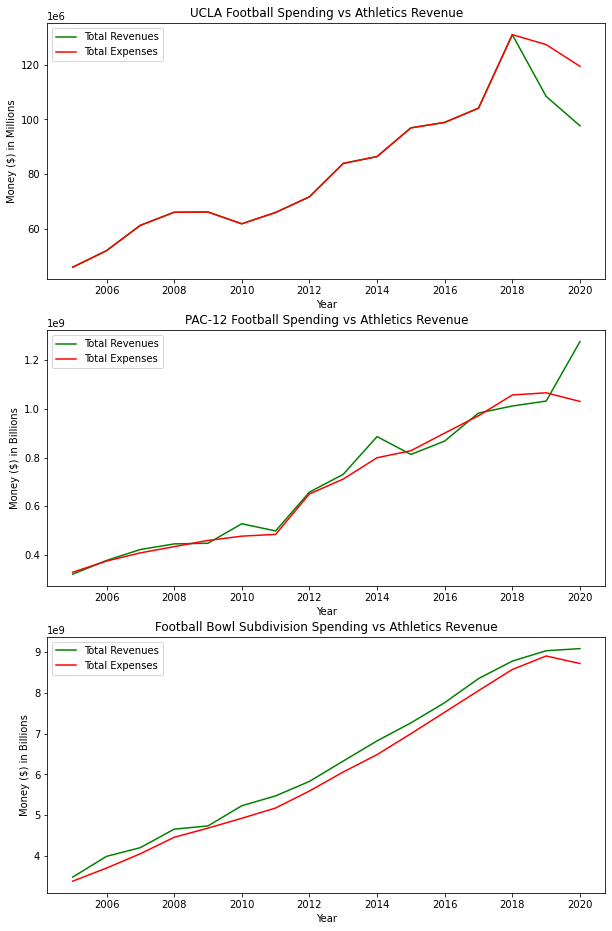

In [339]:
# Data viz
# Line graph overtime of Revenues for each UCLA, PAC-12 median, Football sub-division median
fig, ax = plt.subplots(3, 1, figsize = (10, 16))
ucla_rows = df[df["Data"] == "University of California-Los Angeles"] # rows of just UClA observations
ax[0].plot(ucla_rows["Year"], ucla_rows["Total Revenues"], label = "Total Revenues", color = "green")
ax[0].plot(ucla_rows["Year"], ucla_rows["Total Expenses"], label = "Total Expenses", color = "red")
ax[0].legend(loc="upper left")
ax[0].ticklabel_format(style = "sci", axis = "y", scilimits = (6, 6))
ax[0].set(title = "UCLA Football Spending vs Athletics Revenue", xlabel = "Year", ylabel = "Money ($) in Millions")

pac12_rows = df[df["Data"] == "Pacific-12 Conference Median"] # rows of Pacific-12 median
ax[1].plot(ucla_rows["Year"], pac12_rows["Total Revenues"], label = "Total Revenues", color = "green")
ax[1].plot(ucla_rows["Year"], pac12_rows["Total Expenses"], label = "Total Expenses", color = "red")
ax[1].legend(loc="upper left")
ax[1].ticklabel_format(style = "sci", axis = "y", scilimits = (9, 9))
ax[1].set(title = "PAC-12 Football Spending vs Athletics Revenue", xlabel = "Year", ylabel = "Money ($) in Billions")

fbsub_rows = df[df["Data"] == "Football Bowl Subdivision Median"] # rows of football sub-division median
ax[2].plot(fbsub_rows["Year"], fbsub_rows["Total Revenues"], label = "Total Revenues", color = "green")
ax[2].plot(fbsub_rows["Year"], fbsub_rows["Total Expenses"], label = "Total Expenses", color = "red")
ax[2].legend(loc="upper left")
ax[2].ticklabel_format(style = "sci", axis = "y", scilimits = (9, 9))
ax[2].set(title = "Football Bowl Subdivision Spending vs Athletics Revenue", xlabel = "Year", ylabel = "Money ($) in Billions")

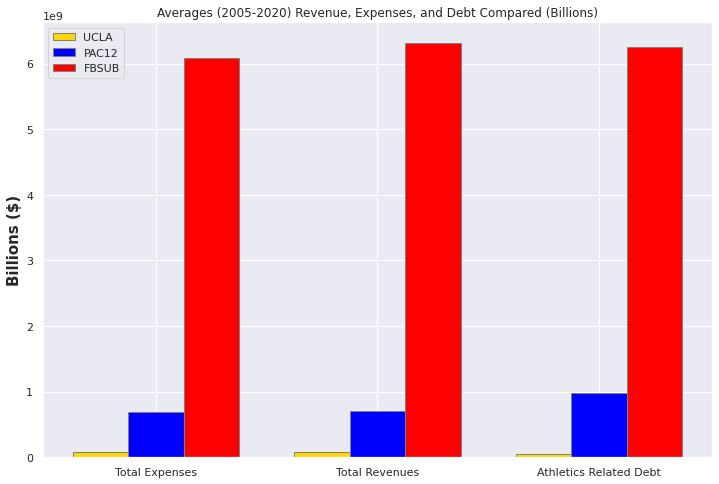

In [485]:
# Data viz
# Barchart for UCLA/PAC-12/Subdivision averages

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
UCLA = [np.mean(ucla_rows["Total Expenses"]),
        np.mean(ucla_rows["Total Revenues"]),
        np.mean(ucla_rows["Athletics Related Debt"])]
PAC12 = [np.mean(pac12_rows["Total Expenses"]),
         np.mean(pac12_rows["Total Revenues"]),
         np.mean(pac12_rows["Athletics Related Debt"])]
FBSUB = [np.mean(fbsub_rows["Total Expenses"]),
         np.mean(fbsub_rows["Total Revenues"]),
         np.mean(fbsub_rows["Athletics Related Debt"])]

# Set position of bar on X axis
br1 = np.arange(len(UCLA))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, UCLA, color ='gold', width = barWidth,
        edgecolor ='grey', label ='UCLA')
plt.ticklabel_format(axis = "both", style = "scientific", scilimits=(9, 9))
plt.bar(br2, PAC12, color ='blue', width = barWidth,
        edgecolor ='grey', label ='PAC12')
plt.ticklabel_format(axis = "both", style = "scientific", scilimits=(9, 9))
plt.bar(br3, FBSUB, color ='red', width = barWidth,
        edgecolor ='grey', label ='FBSUB')
plt.ticklabel_format(axis = "both", style = "scientific", scilimits=(9, 9))

# Adding Xticks
plt.title("Averages (2005-2020) Revenue, Expenses, and Debt Compared (Billions)")
plt.ylabel('Billions ($)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(UCLA))],
        ['Total Expenses', 'Total Revenues', 'Athletics Related Debt'])

    
plt.legend()
plt.show()

### Analysis

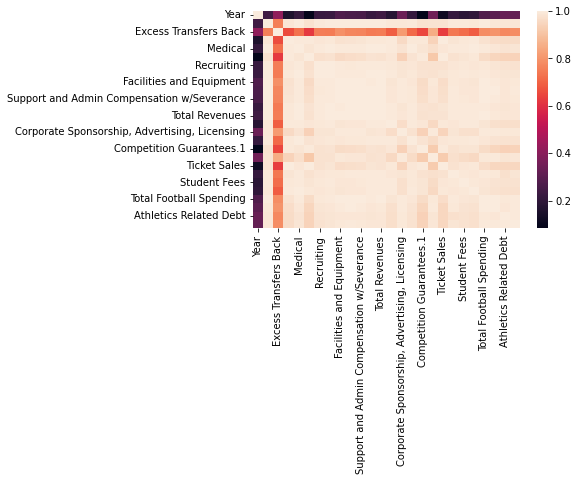

In [39]:
# Data viz
# Correlation heat map of the column variables
cormat = df.corr()
round(cormat,2)
sns.heatmap(cormat);

Student Fees compared to Coaching Salaries


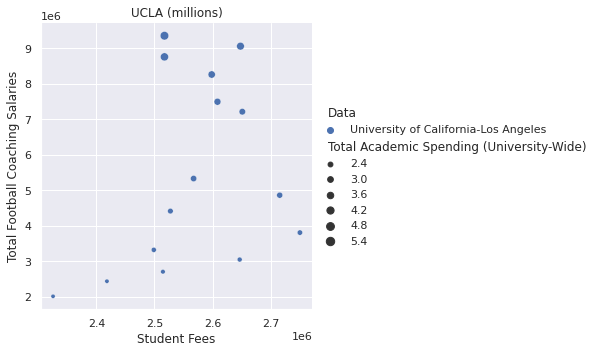

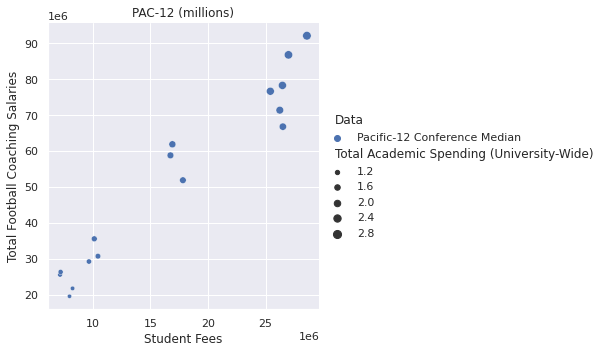

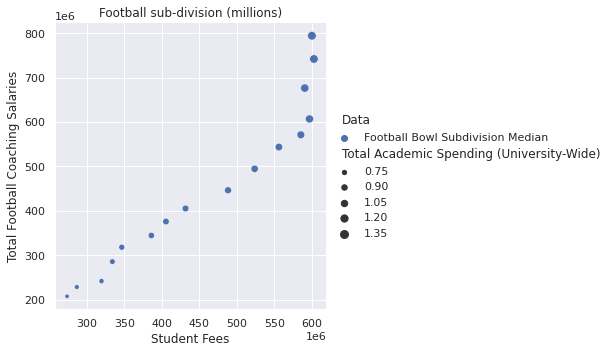

In [456]:
# Data viz
# Looking at student/school/coaches cost
print("Student Fees compared to Coaching Salaries")
sns.relplot(
    data = ucla_rows,
    x = "Student Fees", y = "Total Football Coaching Salaries",
    hue = "Data", size = "Total Academic Spending (University-Wide)"
).set(title = "UCLA (millions)")
plt.ticklabel_format(axis = "both", style = "scientific", scilimits=(6, 6))

sns.relplot(
    data = pac12_rows,
    x = "Student Fees", y = "Total Football Coaching Salaries",
    hue = "Data", size = "Total Academic Spending (University-Wide)"
).set(title = "PAC-12 (millions)")
plt.ticklabel_format(axis = "both", style = "scientific", scilimits=(6, 6))

sns.relplot(
    data = fbsub_rows,
    x = "Student Fees", y = "Total Football Coaching Salaries",
    hue = "Data", size = "Total Academic Spending (University-Wide)"
).set(title = "Football sub-division (millions)")
plt.ticklabel_format(axis = "both", style = "scientific", scilimits=(6, 6))

In [ ]:
# any other data visualization that I can add may come from the machine learning analysis part
# Other suggestions for later creation
# 1. Difference in coaching and student tuition graph (can be bar or box plot)
# 2. Scatter plot on debt playing a role in UCLA student costs or in revenues